In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## 1. zadatak

- Generisati **N** (gdje je N veliki broj) slučajnih uzoraka iz **uniformne raspodjele** u intervalu **[a, b]** i sačuvati ih kao **x**  
- Napraviti **histogram** ovih uzoraka  
- Izračunati **prirodni logaritam** (ln) niza **x** i sačuvati ga kao **y**  
- Napraviti **novi histogram** za **y**  
- Koristeći **jednačinu za transformaciju raspodjela vjerovatnoće**, izračunati **teorijsku funkciju gustine vjerovatnoće (PDF)** za **y** i plotovati je preko histograma za **y**  
- Tražene plotove prikazati **jedan pored drugog**


In [3]:
# Postavljanje parametara
N = 100000  # Veliki broj uzoraka
a, b = 1, 10  # Granice uniformne raspodjele

In [5]:
# Generisanje slučajnih podataka iz uniformne raspodjele
x = np.random.uniform(a, b, N)

Text(0, 0.5, 'Gustina')

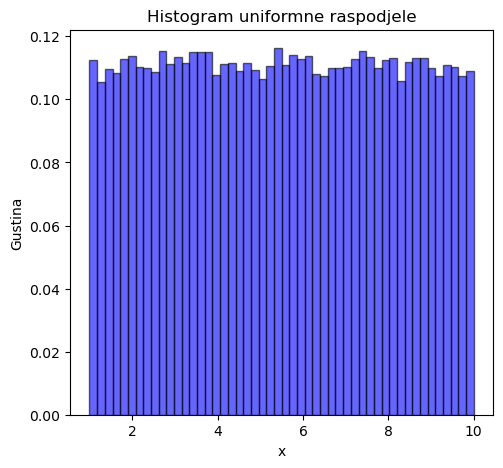

In [7]:
# Histogram originalnih podataka
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(x, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.title("Histogram uniformne raspodjele")
plt.xlabel("x")
plt.ylabel("Gustina")


In [9]:
# Transformacija: prirodni logaritam
y = np.log(x)

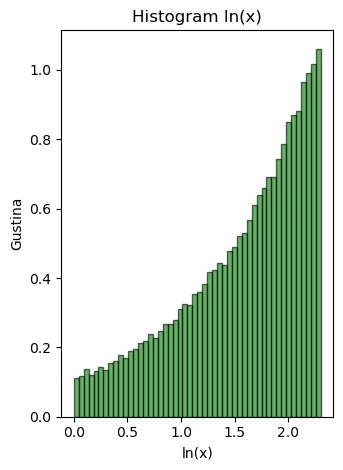

In [11]:
# Histogram transformisanih podataka
plt.subplot(1, 2, 2)
plt.hist(y, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title("Histogram ln(x)")
plt.xlabel("ln(x)")
plt.ylabel("Gustina")

plt.tight_layout()
plt.show()

In [13]:
# Izračunavanje teorijske funkcije gustine vjerovatnoće za y
y_vals = np.linspace(min(y), max(y), 1000)
pdf_y = (1 / (b - a)) * np.exp(y_vals)  # Transformisana PDF funkcija

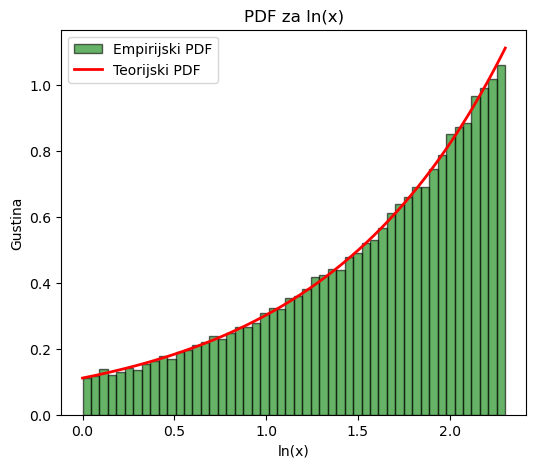

In [15]:
# Prikaz histograma i teorijske PDF funkcije
plt.figure(figsize=(6, 5))
plt.hist(y, bins=50, density=True, alpha=0.6, color='g', edgecolor='black', label="Empirijski PDF")
plt.plot(y_vals, pdf_y, 'r-', linewidth=2, label="Teorijski PDF")
plt.title("PDF za ln(x)")
plt.xlabel("ln(x)")
plt.ylabel("Gustina")
plt.legend()
plt.show()

## 2. zadatak

Radi se o proširenom *Sleepy Beauty* problemu.  
U nedjelju naveče, organizatori eksperimenta uspavljuju ljepoticu.  
Umjesto običnog, fer novčića, koristi se **pristrasan novčić**, sa vjerovatnoćom:  
- **p(H) = p** za glavu  
- **p(T) = 1 − p** za pismo  

U ponedjeljak ujutru, eksperimentatori bacaju novčić:  
- ako padne **glava**, bude ljepoticu samo **u ponedjeljak**  
- ako padne **pismo**, bude je **N puta** u različite dane, gdje je **N** slučajna promjenljiva (iz Poasonove raspodjele, sa parametrom **λ**)  

Kada se probudi, ljepotica ne zna koji je dan i treba da procijeni vjerovatnoću da je "**pala glava**".  
Problem treba riješiti u **Pythonu**. Koristiti **Bajesovu formulu**.


### Poasonova raspodjela:

\[
p(n = k) = \frac{\lambda^k e^{-\lambda}}{k!}
\]


### Dodatno:

Pošto broj buđenja **N**, u slučaju **pisma**, prati Poasonovu raspodjelu, važno je napomenuti da **λ** predstavlja očekivan broj buđenja ako je novčić pao na pismo.  

Uzeti:  
- **λ = 2, 3, 4**  
- **p(H) = 0.65**

Može se iskoristiti `np.random.poisson`.  
Prikazati sve tražene slučajeve za **λ**, **grafički**, jedan pored drugog.


In [19]:
# Funkcija za ažuriranje Bajesove vjerovatnoće
def bayesian_update(p_H, lambda_values, num_samples=10000):
    results = {}
    
    for lambda_ in lambda_values:
        heads_count = 0
        total_wakeups = 0
        
        for _ in range(num_samples):
            if np.random.rand() < p_H:
                heads_count += 1
                total_wakeups += 1  # Buđenje samo u ponedjeljak ako padne glava
            else:
                N = np.random.poisson(lambda_)
                total_wakeups += N  # Buđenje N puta ako padne pismo
        
        # Izračunavanje posteriorne vjerovatnoće P(H | Buđenje)
        P_H_given_Wakeup = heads_count / total_wakeups
        results[lambda_] = P_H_given_Wakeup
    
    return results

In [21]:
# Dati parametri
p_H = 0.65
lambda_values = [2, 3, 4]
num_samples = 10000

In [23]:
# Izračunavanje Bajesovih vjerovatnoća
posterior_probabilities = bayesian_update(p_H, lambda_values, num_samples)

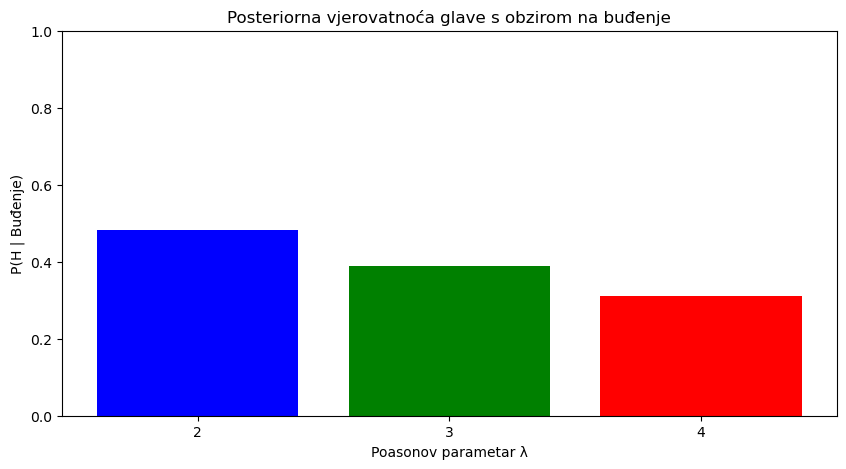

In [25]:
# Crtanje rezultata
plt.figure(figsize=(10, 5))
lambdas = list(posterior_probabilities.keys())
probabilities = list(posterior_probabilities.values())
plt.bar(lambdas, probabilities, color=['blue', 'green', 'red'])
plt.xlabel("Poasonov parametar λ")
plt.ylabel("P(H | Buđenje)")
plt.title("Posteriorna vjerovatnoća glave s obzirom na buđenje")
plt.xticks(lambdas)
plt.ylim(0, 1)
plt.show()

In [27]:
# Prikazivanje numeričkih rezultata
for lambda_, prob in posterior_probabilities.items():
    print(f"λ = {lambda_}: P(H | Buđenje) ≈ {prob:.4f}")

λ = 2: P(H | Buđenje) ≈ 0.4835
λ = 3: P(H | Buđenje) ≈ 0.3882
λ = 4: P(H | Buđenje) ≈ 0.3119
